<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 25)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [3]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df_Crime_Austin_2014_to_2016.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,201611018.0,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN


<h3><u>Rename Column Names for df_Crime_Austin_2014_to_2016</u></h3>

In [4]:
df_Crime_Austin_2014_to_2016.rename_axis({'GO Location Zip':'Zip','Highest NIBRS/UCR Offense Description':'Austin_Offense_Description'},axis = 1, inplace=True)


<h3><u>Check for Duplicated Rows and dropna values in df_Crime_Austin_2014_to_2016 </u></h3>

In [5]:
number_of_Duplicated_Rows = df_Crime_Austin_2014_to_2016.duplicated().sum()
print('There are {} duplicated rows in df_Crime_Austin_2014_2016'.format(number_of_Duplicated_Rows))

There are 0 duplicated rows in df_Crime_Austin_2014_2016


In [6]:
df_Crime_Austin_2014_to_2016 = df_Crime_Austin_2014_to_2016.dropna()

<h3>Change zipcode to an object dtype in df_Crime_Austin_2014_to_2016 dataframe </h3>

In [7]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(int)
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

<h3>Save df_Crime_Austin_2014_to_2016 as .csv file </h3>

In [8]:
df_Crime_Austin_2014_to_2016.to_csv('Final_Generated_Crime_Austin_2014_to_2016.csv',index=False)

<h3>Setup YELP  API Authentication</h3>

In [9]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Austin ZipCodes</h3>

In [10]:
#There are 48 different zip codes in the df_Crime_Austin_2014_2016 dataframe. 

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

<h3>Yelp API Call by austin zipcode </h3>

In [11]:
#Create empty list for all the information pulled from yelp api

info = []

#Using the austin_zips list generate a json file for all the 48 austin zipcodes

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)
    

In [12]:
#pprint.pprint(info)

<h3>Generated Yelp Dataframe</h3>

In [13]:
#Store information from api in below empty lists

list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_address = []


#loop through json file containing all the information from Yelp API call

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_address.append(item.get('location').get('display_address')[0])

In [14]:
#Generate df_Yelp_API dataframe

df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'             : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                            'Company_Address' : list_address})


df_Yelp_API.head(3)

,Business_ID,Business_Name,Business_Ratings,Category,City,Company_Address,Review_Counts,State,Zip
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,5400 Brodie Ln,96,TX,78745
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,4301 W William Cannon,123,TX,78749
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,"Austin, TX 78735",108,TX,78735


In [15]:
#Checking to make sure they both have the same zipcodes
#100 rows need to be removed from yelp dataframe. This rows contain zipcodes which are out of scope for the analysis.

df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     2299
False     100
Name: Zip, dtype: int64

<h3>Double checking the length of Dataframe</h3>

In [16]:
#Double checking the length of Dataframe to ensure all rows contain zipcodes which are in scope

df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
df_Yelp_API.shape

(2299, 9)

In [17]:
#Comparing the number of Zips in df_Yelp_API and df_Crime_Austin_2014_to_2016

df_Yelp_API.Zip.nunique() == df_Crime_Austin_2014_to_2016.Zip.nunique()

True

<h3>Checking for duplicated columns in df_Yelp_API dataframe </h3>

In [18]:
#There are 1055 duplicated rows in this dataframe these will be deleted 

df_Yelp_API.duplicated().sum()

1055

In [19]:
#After Dropping the duplicated row the dataframe will have the following number of rows

len(df_Yelp_API) - df_Yelp_API.duplicated().sum()

1244

In [20]:
#drop duplicated rows in df_Yelp_API and keep the first 

df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

#Checking length of df_Yelp_API to ensure it has the correct amount of rows

df_Yelp_API.shape

(1244, 9)

<h3>Create blank columns for df_Yelp_API dataframe to store all Reviews</h3>

In [21]:
#Create blank columns for df_Yelp_API dataframe to store Reviews 

df_Yelp_API['First_Review'] = " "
df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Third_Review'] = " "

In [22]:
#Use Yelp API to place all reviews in review columns associated with df_Yelp_API dataframe

for index,row in df_Yelp_API.iterrows():
    review = row['Business_ID']
    
    url_review = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(review)
    
    api_reviews = requests.get(url=url_review,headers=headers).json()
    
    df_Yelp_API.set_value(index,'First_Review',api_reviews['reviews'][0]['text'])
    df_Yelp_API.set_value(index,'Second_Review',api_reviews['reviews'][1]['text'])
    df_Yelp_API.set_value(index,'Third_Review',api_reviews['reviews'][2]['text'])

#display df_Yelp_API dataframe after all information has be obtained   

df_Yelp_API.head(10)

,Business_ID,Business_Name,Business_Ratings,Category,City,Company_Address,Review_Counts,State,Zip,First_Review,Second_Review,Third_Review
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,5400 Brodie Ln,96,TX,78745,I was searching for a comfortable mattress and...,I was helped by a Hannah at this store and she...,Troy was great. Very knowledgeable on mattress...
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,4301 W William Cannon,123,TX,78749,Healthy Pet has a great selection of cat & dog...,This location is just as helpful as the Lakeli...,This is a small store and we love it! So do th...
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,"Austin, TX 78735",108,TX,78735,ToastEnt was the PERFECT match for our wedding...,I was very impressed with how professional our...,"Ang was amazing, outgoing, patient and willing..."
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,6705 Us-290 W,112,TX,78735,Update - just ordered again from Mercedes. In ...,"I don't even know how to begin, but I can hone...",Absolutely fantastic! Great storage for flower...
5,zen-well-austin,Zen Well,5.0,reflexology,Austin,3421 W William Cannon Dr,188,TX,78745,This was amazing! Dawn blew me away. She was s...,"Overall, a very unique massage experience!\n\n...",Zen Well made me more satisfied after leaving ...
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,4970 W Hwy 290,87,TX,78735,The Sage Blossom is awesome! I had a bunch of ...,"Well Drats, back to the drawing board.\n\nMy r...","The Sage Blossom, the Whole experience was ama..."
7,barefoot-mosquito-control-austin,Barefoot Mosquito Control,5.0,pest_control,Austin,8300 Old Bee Caves Rd,96,TX,78735,"After one treatment (two days ago), there has ...",We use them every month during the summer/fall...,We were customers. We paid for three treatment...
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,8648 Old Bee Caves Rd,174,TX,78735,I've lived in 5 states. This is by far the mos...,Like a true paradise full of beautiful flora a...,"Love, love, love this place! Did I mention I l..."
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,5716 W Hwy 290,98,TX,78735,I wanted to write this review even though I ne...,If you want to support businesses who support ...,"Service is great, but I do complain that they ..."
10,manish-patel-od-todays-vision-south-towne-aust...,"Today's Vision South Towne - Manish Patel, O.D",5.0,optometrists,Austin,5353 W Hwy 290 Service Rd,80,TX,78735,I have been going to Today's Vision for a coup...,Dr. Patel was every bit as good as other revie...,I totally loved how thorough and friendly Dr. ...


<h3>Save df_Yelp_API to a csv. titled,"Final_Generated_Yelp_Reviews_Ratings.csv"</h3>

In [23]:
df_Yelp_API.to_csv('Final_Generated_Yelp_Reviews_Ratings.csv',index=False)

<h3>Peform Sentiment Analysis on all Reviews </h3>

In [24]:
#Generate blank columns to hold values for Sentiment Analysis

df_Yelp_API['First_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['First_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['First_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Second_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Third_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Compound'] = " "


In [25]:
#Sentiment Intensitiy Analyzer

analyzer = SentimentIntensityAnalyzer()

In [26]:
#Generate blank columns to hold values for Sentiment Analysis


for index,row in df_Yelp_API.iterrows():
    
    #Setting each variable to change for each row in the Reviews Columns
    
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                               
    
    #Run vaderSentiment on each each Review Column
    
    results_first_review_column = analyzer.polarity_scores(first_review_column) 
    results_second_review_column = analyzer.polarity_scores(second_review_column)
    results_third_review_column = analyzer.polarity_scores(third_review_column)
    
    
    
    #Run vaderSentiment on First_Review Column
    
    compound_first_review = results_first_review_column["compound"]
    pos_first_review = results_first_review_column["pos"]
    neu_first_review= results_first_review_column["neu"]
    neg_first_review = results_first_review_column["neg"]
    
    
    
    #Run vaderSentiment on  Second_Review Column
    
    compound_second_review = results_second_review_column["compound"]
    pos_second_review = results_second_review_column["pos"]
    neu_second_review= results_second_review_column["neu"]
    neg_second_review = results_second_review_column["neg"]
    
   
    #Run vaderSentiment on  Third_Review Column
    
    compound_third_review = results_third_review_column["compound"]
    pos_third_review = results_third_review_column["pos"]
    neu_third_review= results_third_review_column["neu"]
    neg_third_review = results_third_review_column["neg"]
    
    
    #Add Sentiments Analysis for each Review to dataframe
    
    #Add sentiments for First_Review Column into an array
    
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Compound',compound_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Positive',pos_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Neutral',neu_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Negative',neg_first_review)
    
    # Add sentiments for Second_Review Column into an array
    
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Compound',compound_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Positive',pos_second_review )
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Neutral',neu_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Negative',neg_second_review)
    
    # Add sentiments for Third_Review Column into an array
    
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Compound',compound_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Positive',pos_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Neutral',neu_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Negative',neg_third_review)
    
     

In [27]:
#arrange columns in df_Yelp_API dataframe

df_Yelp_API = df_Yelp_API[['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Review_Counts', 'State', 'Zip', 
             
       'First_Review',   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
       'Second_Review',
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
       'Third_Review',
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound']]

In [28]:
#Change all sentiment analysis to numeric dtypes

df_Yelp_API['First_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Compound'])
df_Yelp_API['First_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Negative'])
df_Yelp_API['First_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Positive'])
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Neutral'])


df_Yelp_API['Second_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Compound'])
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Negative'])
df_Yelp_API['Second_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Positive'])
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Neutral'])

df_Yelp_API['Third_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Compound'])
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Negative'])
df_Yelp_API['Third_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Positive'])
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Neutral'])


<h3>Save df_Yelp_API_Reviews_Sentiment_Ratings to a csv. titled,"Final__Generated_Yelp_API_Sentiment_Analysis.csv"</h3>

In [30]:
df_Yelp_API.to_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv',index=False)

In [31]:
df_Yelp_API.head(300)

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,First_Review,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,96,TX,78745,I was searching for a comfortable mattress and...,0.125,0.083,0.792,0.2732,I was helped by a Hannah at this store and she...,0.158,0.000,0.842,0.4803,Troy was great. Very knowledgeable on mattress...,0.410,0.000,0.590,0.9360
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,123,TX,78749,Healthy Pet has a great selection of cat & dog...,0.245,0.000,0.755,0.7783,This location is just as helpful as the Lakeli...,0.180,0.000,0.820,0.6705,This is a small store and we love it! So do th...,0.147,0.000,0.853,0.6696
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,108,TX,78735,ToastEnt was the PERFECT match for our wedding...,0.216,0.000,0.784,0.8001,I was very impressed with how professional our...,0.329,0.000,0.671,0.9149,"Ang was amazing, outgoing, patient and willing...",0.222,0.000,0.778,0.7184
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,112,TX,78735,Update - just ordered again from Mercedes. In ...,0.233,0.000,0.767,0.7712,"I don't even know how to begin, but I can hone...",0.372,0.000,0.628,0.9504,Absolutely fantastic! Great storage for flower...,0.413,0.000,0.587,0.9409
5,zen-well-austin,Zen Well,5.0,reflexology,Austin,188,TX,78745,This was amazing! Dawn blew me away. She was s...,0.112,0.091,0.797,0.2003,"Overall, a very unique massage experience!\n\n...",0.119,0.087,0.794,0.2003,Zen Well made me more satisfied after leaving ...,0.184,0.000,0.816,0.6361
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,87,TX,78735,The Sage Blossom is awesome! I had a bunch of ...,0.140,0.000,0.860,0.6588,"Well Drats, back to the drawing board.\n\nMy r...",0.167,0.000,0.833,0.5574,"The Sage Blossom, the Whole experience was ama...",0.324,0.000,0.676,0.9001
7,barefoot-mosquito-control-austin,Barefoot Mosquito Control,5.0,pest_control,Austin,96,TX,78735,"After one treatment (two days ago), there has ...",0.095,0.000,0.905,0.3680,We use them every month during the summer/fall...,0.075,0.000,0.925,0.2960,We were customers. We paid for three treatment...,0.045,0.058,0.898,-0.0941
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,174,TX,78735,I've lived in 5 states. This is by far the mos...,0.075,0.068,0.857,0.0534,Like a true paradise full of beautiful flora a...,0.470,0.000,0.530,0.9657,"Love, love, love this place! Did I mention I l...",0.471,0.000,0.529,0.9665
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,98,TX,78735,I wanted to write this review even though I ne...,0.000,0.065,0.935,-0.1877,If you want to support businesses who support ...,0.320,0.000,0.680,0.8360,"Service is great, but I do complain that they ...",0.092,0.117,0.791,-0.1779
10,manish-patel-od-todays-vision-south-towne-aust...,"Today's Vision South Towne - Manish Patel, O.D",5.0,optometrists,Austin,80,TX,78735,I have been going to Today's Vision for a coup...,0.073,0.158,0.769,-0.3182,Dr. Patel was every bit as good as other revie...,0.136,0.000,0.864,0.5994,I totally loved how thorough and friendly Dr. ...,0.214,0.064,0.723,0.7346


<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

In [32]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [33]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [34]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [35]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


In [36]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')

In [37]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

,Zip,Number Of Crimes,Review Sum,%_Avg_Business_Ratings,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,78610,2,430,4.7,0.222,0.0052,0.7728,0.68454,0.2286,0,0.7714,0.67302,0.2726,0.0444,0.683,0.75576
1,78733,3,93,4.88,0.0205,0.036,0.9435,-0.019925,0.064,0.04225,0.89375,0.033725,0.17325,0,0.82675,0.5728
2,78732,5,861,4.75,0.227556,0.0247778,0.747611,0.583228,0.227778,0,0.772222,0.629022,0.256444,0.0172778,0.726333,0.645433
3,78737,6,1075,4.75,0.1909,0.037,0.772,0.43109,0.1514,0.0413,0.8073,0.37528,0.2233,0.013,0.7637,0.67895
4,78712,19,731,4.42,0.215105,0.0279474,0.756895,0.558005,0.229263,0.0197895,0.751,0.643,0.167842,0.0256842,0.806474,0.464247
5,78728,24,2015,4.88,0.182905,0.042,0.775048,0.428762,0.212667,0.0418571,0.745333,0.53709,0.188714,0.0289524,0.782286,0.522705
6,78652,31,246,4.88,0.3445,0.03025,0.62525,0.880975,0,0.0885,0.9115,-0.3639,0.17725,0.00775,0.815,0.48225
7,78653,83,464,4.67,0.163833,0.0296667,0.8065,0.418383,0.198889,0.0201667,0.780944,0.53385,0.187389,0.0507222,0.761889,0.380494
8,78742,125,125,4.5,0.153,0.0345,0.8125,0.47185,0.214,0.021,0.765,0.80395,0.3405,0.0415,0.618,0.8129
9,78730,140,785,4.75,0.163125,0.025125,0.811812,0.480038,0.209625,0.03225,0.758188,0.587213,0.136813,0.0264375,0.83675,0.292731


<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

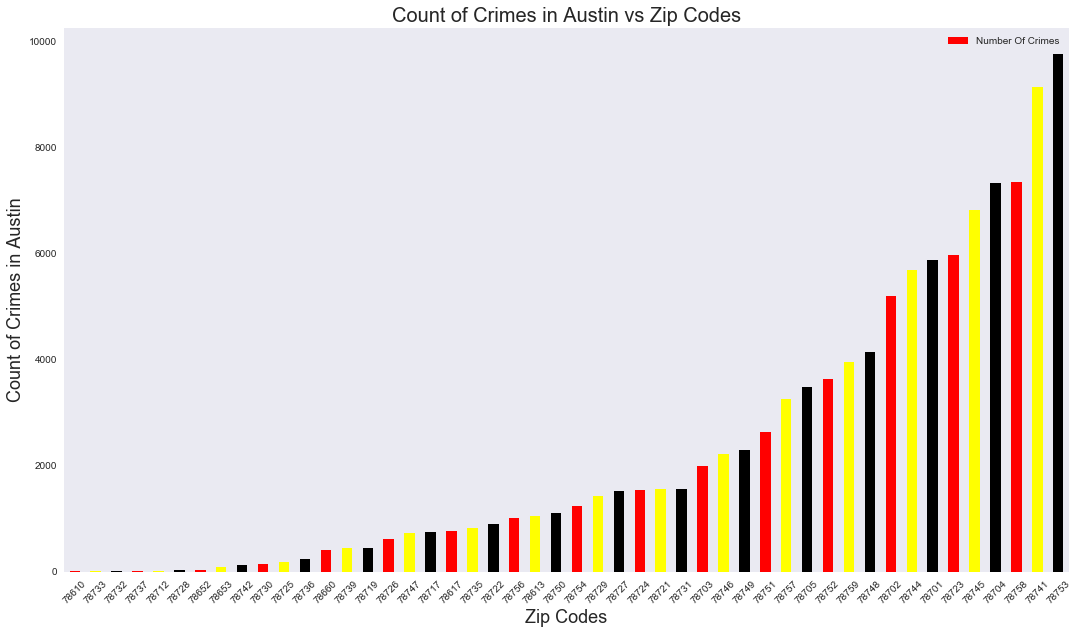

In [39]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));